In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('metadata.csv', index_col=0)
df

cellnames cellids grouping  time_continuous  time_discrete
C1          C1      C1       M3         1.076810              8
C10         C2     C10       M5         0.902601              7
C100        C3    C100       M4         1.277937              9
C101        C4    C101       M4         1.128898              8
C102        C5    C102       M5         0.911676              7
...        ...     ...      ...              ...            ...
C95       C571     C95       M4         1.140622              8
C96       C572     C96       M5         0.845805              6
C97       C573     C97       M3         0.959903              7
C98       C574     C98       M1         0.000000              1
C99       C575     C99       M3         1.000937              7

[562 rows x 5 columns]

In [3]:
# c = df['U']
g = df['grouping'].tolist()
set(g)

{'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'}

In [5]:
types = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']#, 'M10']
# types = list(set(g))
types

['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']

In [6]:
cellnames = df['cellnames'].tolist()
cellids = df['cellids'].tolist()

In [7]:
labels = [types.index(g[cellids.index(name)])+1 for name in cellnames]

In [8]:
pd.DataFrame(labels).to_csv('labels.csv', header=False, index=False)

In [9]:
data_df = pd.read_csv('data.csv', header='infer', index_col=0)
data_df

G1        G2        G3        G4        G5        G6        G7  \
C1    6.402090  6.486835  3.693621  0.000000  0.000000  0.000000  0.000000   
C2    0.000000  0.000000  5.284367  0.000000  0.000000  0.000000  0.000000   
C3    0.000000  5.039839  6.404749  0.000000  0.000000  0.000000  0.000000   
C4    0.000000  0.000000  5.455035  4.487555  0.000000  3.136493  0.000000   
C5    0.000000  0.000000  5.108232  0.000000  6.380884  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
C571  6.362561  5.982270  4.528412  3.464042  5.786338  4.092236  0.000000   
C572  0.000000  6.058931  3.375901  0.000000  0.000000  0.000000  0.000000   
C573  3.706154  4.924849  0.000000  4.960187  4.605848  0.000000  0.000000   
C574  0.000000  0.000000  0.000000  3.518951  4.365882  3.674825  2.094163   
C575  6.265923  5.633953  4.881797  0.000000  0.000000  5.488992  0.000000   

            G8        G9  G10  ...     G7839     G7840     G7841     G7842  \
C1    0.000000  6.566877  0.0  ...  0.000000  5.607472  6.890951  3.252119   
C2    3.438904  6.212011  0.0  ...  4.159988  0.000000  5.609300  0.000000   
C3    7.326249  0.000000  0.0  ...  0.000000  0.000000  0.000000  8.247983   
C4    3.025800  0.000000  0.0  ...  5.476239  0.000000  0.000000  0.000000   
C5    6.496888  0.000000  0.0  ...  0.000000  0.000000  0.000000  6.428411   
...        ...       ...  ...  ...       ...       ...       ...       ...   
C571  0.000000  0.000000  0.0  ...  0.000000  3.911624  0.000000  0.000000   
C572  0.000000  3.202974  0.0  ...  0.000000  0.000000  0.000000  0.000000   
C573  0.000000  4.605848  0.0  ...  0.000000  3.327500  5.685549  0.000000   
C574  0.000000  0.000000  0.0  ...  5.233488  4.365882  0.000000  0.000000   
C575  0.000000  0.000000  0.0  ...  5.146354  5.046275  0.000000  0.000000   

         G7843     G7844     G7845     G7846     G7847     G7848  
C1    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
C2    0.000000  0.000000  0.000000  5.059465  0.000000  0.000000  
C3    0.000000  0.000000  1.581832  0.000000  0.000000  7.175244  
C4    0.000000  2.471553  0.000000  3.425231  0.000000  0.000000  
C5    0.000000  0.000000  0.000000  0.000000  3.604585  5.324636  
...        ...       ...       ...       ...       ...       ...  
C571  4.862877  0.000000  4.004754  4.589822  0.000000  3.004438  
C572  5.352973  0.000000  0.000000  5.129565  0.000000  5.684368  
C573  0.000000  0.000000  4.733877  4.888623  0.000000  3.706154  
C574  3.248146  3.746869  0.000000  4.271335  4.365882  0.000000  
C575  0.000000  5.146354  0.000000  0.000000  1.754272  1.754272  

[562 rows x 7848 columns]

In [10]:
data = np.array(data_df)

In [11]:
from sklearn.decomposition import PCA
data = PCA(n_components=30).fit_transform(data)

In [12]:
data.shape

(562, 30)

In [13]:
from sklearn.manifold import TSNE
X = TSNE(n_components=2).fit_transform(data)

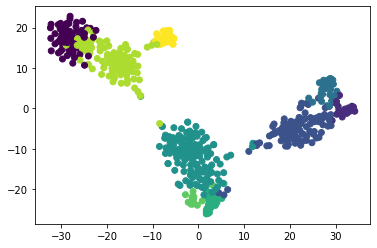

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=labels)